In [1]:
import os,sys
from importlib import reload
import numpy as np
sys.path.append(r'C:\Softwares\Github')
%run "C:\Softwares\Github\ImageAnalysis3\required_files\Startup_py3.py"

In [2]:
import ImageAnalysis3 as ia3

In [3]:
from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

13192


In [4]:
fov_param = {'data_folder':r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x',
             'save_folder':r'E:\Pu\Analysis\20230403-4T1_zombie_4x',
             'experiment_type': 'DNA',
             'num_threads': 8,
             'correction_folder':r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 2000,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# Process fov

In [5]:
_overwrite = False

_warp_image = True

_save_images = True



_fit_spots = True

bad_fov_ids = []

sel_fov_ids = np.arange(0,70) # batch 1

for _fov_id in sel_fov_ids:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue

    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    
    # 1. Process dapi
    dapi_im = fov._load_dapi_image()
    # 2. Process image into candidate spots
    fov.parallel = False
    setattr(fov, "combo_ref_id", 0)
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)

    # 3. Process image into candidate spots
    fov.parallel = False
    setattr(fov, "relabeled_combo_ref_id", 0)
    fov._process_image_to_spots('relabeled_combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    #break

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 9
- Number of field of views: 70
- Importing csv format color_usage file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
- 9 folders are found according to color-usage annotation.
+ loading fov_info from file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_00.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'relabeled_combo_ref_im'] in 6.546s.
+ loading correction from file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_00.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_00.hdf5
++ base attributes loaded:[] in

-- checking combo, region:[54 53 52] in 0.035s.
-- checking combo, region:[57 56 55] in 0.029s.
-- checking combo, region:[38] in 0.011s.
- No combo images and spots requires processing, skip.
-- folders not selected, allow processing all 9 folders
-- checking relabeled_combo, region:[39  1 37] in 0.046s.
- No relabeled_combo images and spots requires processing, skip.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 9
- Number of field of views: 70
- Importing csv format color_usage file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
- 9 folders are found according to color-usage annotation.
+ loading fov_info from file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_05.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im'] in 4.408s.
+ loading correction from file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_05.hdf5
++ load bleed correction prof

C:\Users\puzheng\.conda\envs\postanalysis_py39\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


2000 fitted in 120.699s.
-- start fitting spots in channel:647, 2000 seeded with th=600.0, 2000 fitted in 99.612s.
-- start fitting spots in channel:561, 2000 seeded with th=600.0, 2000 fitted in 91.562s.
- writting relabeled_combo spots into file:E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_05.hdf5
-- updated spots for id:[39, 1, 37] in 0.007s
in 574.44s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 9
- Number of field of views: 70
- Importing csv format color_usage file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
- 9 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic

-- updated ims for id:[39, 1, 37], drifts for id:[39, 1, 37] in 5.019s
-- start fitting spots in channel:750, 2000 seeded with th=600.0, 2000 fitted in 87.126s.
-- start fitting spots in channel:647, 2000 seeded with th=600.0, 2000 fitted in 80.525s.
-- start fitting spots in channel:561, 2000 seeded with th=600.0, 1999 fitted in 84.327s.
- writting combo spots into file:E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_06.hdf5
-- updated spots for id:[39, 1, 37] in 0.010s
+ batch process image: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H1C2\Conv_zscan_06.dax for channels:['750', '647', '561']
- loading combo info from file:Conv_zscan_06.hdf5 in 0.208s.
-- ['750', '647', '561'] images are required to process, [] images are loaded from save file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_06.hdf5
- correct the whole fov for image: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H1C2\Conv_zscan_06.dax
-- loading image

- loading combo info from file:Conv_zscan_06.hdf5 in 0.170s.
-- ['750', '647', '561'] images are required to process, [] images are loaded from save file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_06.hdf5
- correct the whole fov for image: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H5C6\Conv_zscan_06.dax
-- loading image from file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H5C6\Conv_zscan_06.dax  in 21.762s
-- removing hot pixels for channels:['750', '647', '561', '488'] in 13.954s
-- bleedthrough correction for channels: ['750', '647', '561'] in 8.444s
-- illumination correction for channels: 750, 647, 561, 488, in 4.497s
-- apply bead_drift calculate for channel: 488
-- start aligning given source image to given reference image.
-- drift 0: [ -1.46 -45.58   2.18] in 2.307s.
-- drift 1: [ -1.67 -45.57   2.22] in 2.231s.
-- drift 2: [ -1.54 -45.59   2.23] in 2.255s.
--- drifts for crops:[0 1 2] pass the threso

-- start fitting spots in channel:647, 2000 seeded with th=600.0, 2000 fitted in 89.918s.
-- start fitting spots in channel:561, 2000 seeded with th=600.0, 2000 fitted in 80.722s.
- writting relabeled_combo spots into file:E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_06.hdf5
-- updated spots for id:[39, 1, 37] in 0.010s
in 533.15s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 9
- Number of field of views: 70
- Importing csv format color_usage file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
- 9 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_20

-- updated ims for id:[39, 1, 37], drifts for id:[39, 1, 37] in 5.026s
-- start fitting spots in channel:750, 683 seeded with th=600.0, 683 fitted in 58.397s.
-- start fitting spots in channel:647, 2000 seeded with th=600.0, 2000 fitted in 82.604s.
-- start fitting spots in channel:561, 2000 seeded with th=600.0, 2000 fitted in 98.572s.
- writting combo spots into file:E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_07.hdf5
-- updated spots for id:[39, 1, 37] in 0.008s
+ batch process image: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H1C2\Conv_zscan_07.dax for channels:['750', '647', '561']
- loading combo info from file:Conv_zscan_07.hdf5 in 0.185s.
-- ['750', '647', '561'] images are required to process, [] images are loaded from save file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_07.hdf5
- correct the whole fov for image: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H1C2\Conv_zscan_07.dax
-- loading image f

- loading combo info from file:Conv_zscan_07.hdf5 in 0.175s.
-- ['750', '647', '561'] images are required to process, [] images are loaded from save file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_07.hdf5
- correct the whole fov for image: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H5C6\Conv_zscan_07.dax
-- loading image from file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H5C6\Conv_zscan_07.dax  in 15.446s
-- removing hot pixels for channels:['750', '647', '561', '488'] in 14.089s
-- bleedthrough correction for channels: ['750', '647', '561'] in 8.536s
-- illumination correction for channels: 750, 647, 561, 488, in 4.594s
-- apply bead_drift calculate for channel: 488
-- start aligning given source image to given reference image.
-- drift 0: [ -0.42 -44.1    6.7 ] in 2.310s.
-- drift 1: [ -0.18 -44.1    6.8 ] in 2.309s.
-- drift 2: [ -0.28 -44.08   6.77] in 2.280s.
--- drifts for crops:[0 1 2] pass the threso

KeyboardInterrupt: 

In [10]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    combo_ims = list(_grp['ims'][:])


In [9]:
fov._load_from_file('combo')

+ loading combo from file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_00.hdf5
++ finish loading combo in 0.007s. 


In [ ]:
fov._load_from_file('combo')

In [18]:
fov._load_dapi_image()

-- choose dapi images from folder: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H0C1.
- correct the whole fov for image: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H0C1\Conv_zscan_00.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H0C1\Conv_zscan_00.dax  in 18.966s
-- removing hot pixels for channels:['405'] in 3.490s
-- illumination correction for channels: 405, in 1.177s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 24.227s
-- saving fov_info to file: E:\Pu\Analysis\20230403-4T1_zombie_4x\Conv_zscan_00.hdf5
++ base attributes saved:['dapi_im'] in 4.851s.


array([[[  926,   988,   910, ...,   669,   574,   546],
        [  937,   940,   894, ...,   555,   610,   571],
        [  866,   940,   858, ...,   641,   657,   677],
        ...,
        [17885, 16895, 16710, ...,  4584,  4560,  4600],
        [17895, 17355, 17166, ...,  4739,  4655,  4848],
        [17756, 17431, 17579, ...,  4894,  4859,  4698]],

       [[  845,   934,   826, ...,   555,   594,   630],
        [  899,   791,   839, ...,   560,   558,   646],
        [  826,   837,   790, ...,   541,   588,   546],
        ...,
        [17411, 16367, 16710, ...,  4266,  4319,  3805],
        [17576, 17355, 16482, ...,  4355,  4203,  4185],
        [18331, 16875, 16716, ...,  4439,  4229,  4452]],

       [[  858,   961,   866, ...,   583,   544,   544],
        [  764,   864,   923, ...,   641,   571,   533],
        [  880,   964,   877, ...,   652,   557,   657],
        ...,
        [17727, 17271, 17390, ...,  3818,  4043,  3918],
        [17255, 17125, 17322, ...,  4149,  39

In [17]:
visual_tools.imshow_mark_3d_v2(list(_ims)+[transSegLabels, transSegLabels==cell_id])

NameError: name '_ims' is not defined

In [91]:

sel_int_th = 1000
sel_spots_list = [_spots[_spots[:,0] > sel_int_th] 
                  for _spots in fov.combo_spots_list]

In [92]:
coord_dict = {
    'coords': [],#np.fliplr(sel_spots[:,1:4]),
    'class_ids': [],#sel_ids,
}

for _i, _spots in enumerate(sel_spots_list):
    _spots = _spots[_spots[:,0]>0]
    if len(_spots) > 0:
        coord_dict['coords'].extend(list(np.fliplr(_spots[:,1:4])))
        #coord_dict['coords'].extend(list(np.fliplr(_crop.crop_coords(_spots.to_coords()[_sel_inds]))))
        coord_dict['class_ids'].extend(list(np.ones(len(_spots),dtype=np.int32) * _i))

In [93]:
len(coord_dict['coords'])

26467

<IPython.core.display.Javascript object>


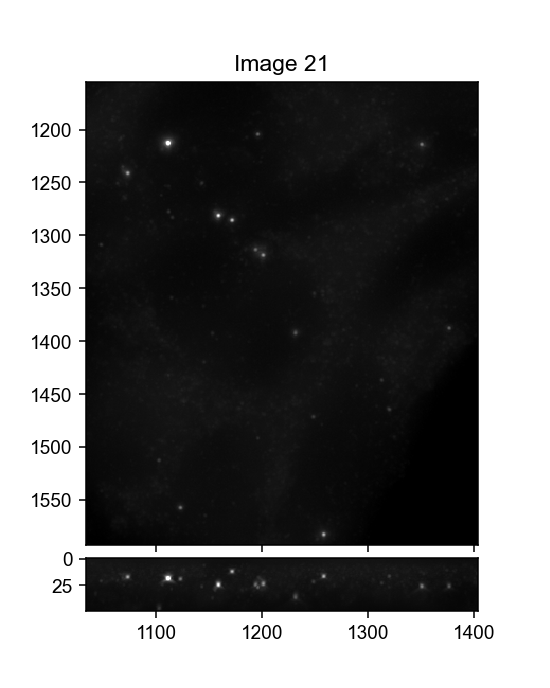

In [325]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(combo_ims)

<IPython.core.display.Javascript object>


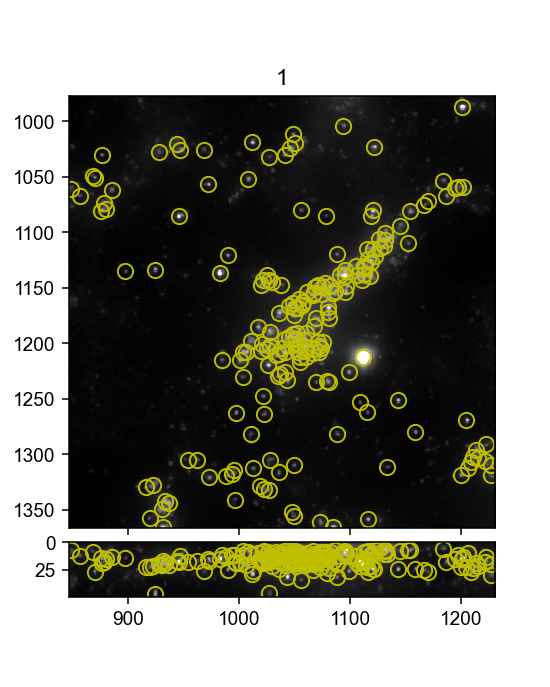

In [324]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(list(combo_ims) + [fov.dapi_im], 
                               given_dic=coord_dict, image_names=list(fov.combo_ids)+['dapi'])

In [30]:
max_combo_im = np.max(combo_ims[1:], 0)

In [32]:
mean_combo_im = np.mean(combo_ims[1:], 0)

<IPython.core.display.Javascript object>


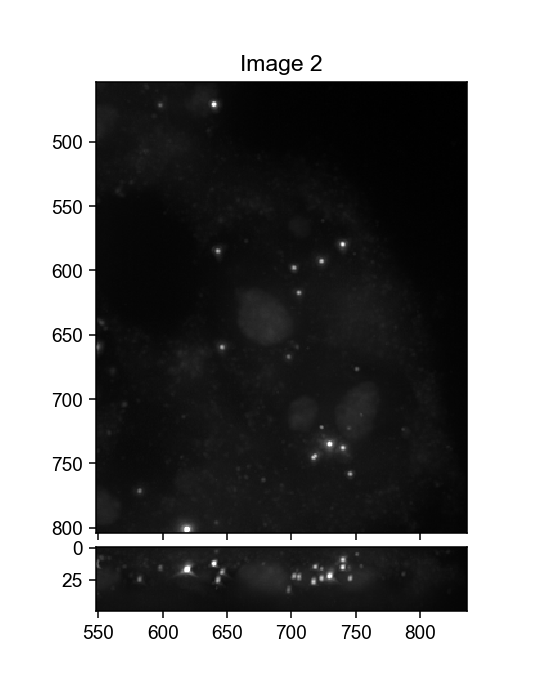

In [323]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im, max_combo_im, mean_combo_im])

# Load codebook

In [94]:
import pandas as pd
codebook_filename = r'\\wi-bigdata.wi.mit.edu\solexa_weissman\puzheng\MERFISH_Probes\PE_TS\MF_PE_TS_agilentOrder_Codebook.xlsx'
codebook = pd.read_excel(codebook_filename)

In [95]:
from ImageAnalysis3.io_tools.crop import crop_neighboring_area
from ImageAnalysis3.classes.preprocess import Spots3D

In [96]:
encoded_spots = [Spots3D(_s) for _s in sel_spots_list[1:]]
encoded_ids = fov.combo_ids[1:]

In [97]:
# find spots that has at least two close neighbors
from scipy.spatial import KDTree
pixel_sizes = classes.default_pixel_sizes

_candidate_coords = np.concatenate([_s.to_coords() for _s in encoded_spots]) * pixel_sizes
_candidate_ids = np.concatenate([np.ones(len(_s))*_id for _s,_id in zip(encoded_spots, encoded_ids)])

In [99]:
search_th = 500
min_matched_neighbors = 3

_tree = KDTree(_candidate_coords)
neighbor_list = _tree.query_ball_point(_candidate_coords, search_th, )
# convert to id and exclude self
neighbor_id_list = [_candidate_ids[_n][_candidate_ids[_n]!=_id] for _id, _n in zip(_candidate_ids, neighbor_list)]

_sel_flags = np.array([len(_ni) >= min_matched_neighbors-1 for _ni in neighbor_id_list])

_sel_coords, _sel_ids = _candidate_coords[_sel_flags], _candidate_ids[_sel_flags]


In [106]:
_sel_ints = np.concatenate(encoded_spots)[_sel_flags,0]

In [100]:
test_coord_dict = {'coords':list(np.fliplr(_sel_coords/pixel_sizes)),
                                                         'class_ids':list(_sel_ids.astype(np.int32)-37)}

<IPython.core.display.Javascript object>


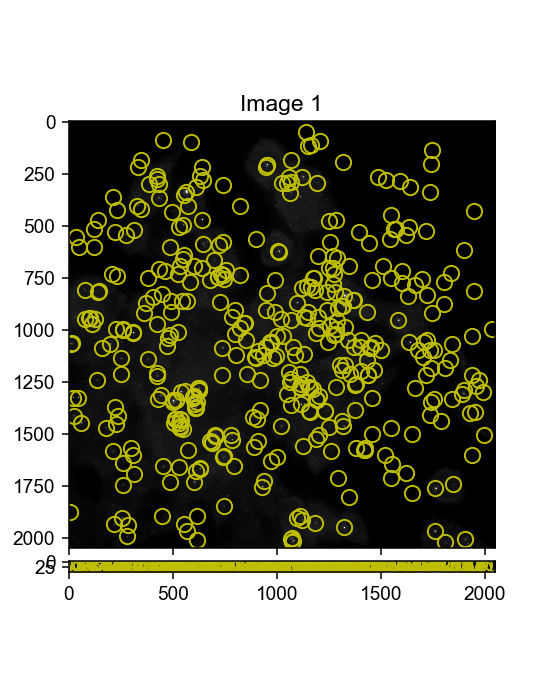

In [322]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(combo_ims[1:], given_dic=test_coord_dict)

In [111]:
_sel_ints[5614]

56807.832

In [123]:
# ims
cims_list = []
for _ind in np.argsort(_sel_ints)[::-1][:100]:
    _coord = _sel_coords[_ind]
    _cims = [crop_neighboring_area(_im, _coord/pixel_sizes, 7) for _im in combo_ims[1:]]
    cims_list.append(_cims)

<IPython.core.display.Javascript object>


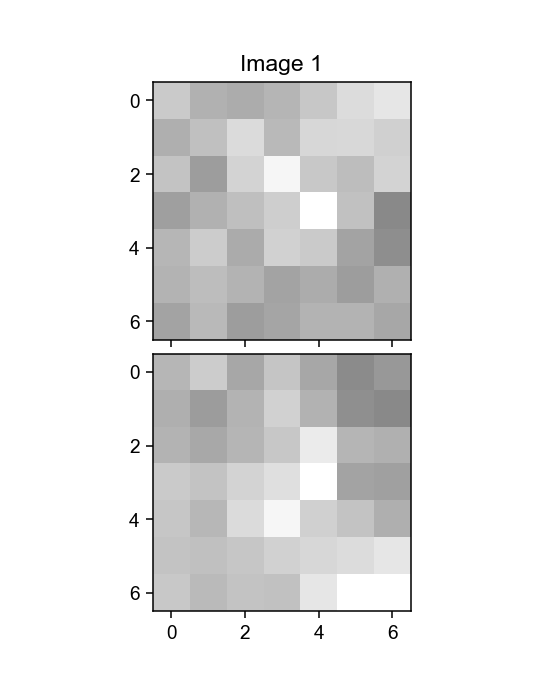

In [115]:
visual_tools.imshow_mark_3d_v2(_cims)

In [174]:
code_array = codebook.values[:,1:].astype(np.int32)

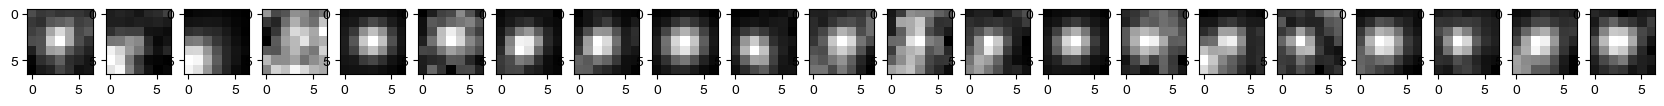

In [302]:
%matplotlib inline

_sel_cims = cims_list[6]

fig, axes = plt.subplots(1,21, figsize=(21,1),)

for _ax, _im in zip(axes, _sel_cims):
    _ax.imshow(np.max(_im, 0), 
               #vmin=np.min(_im), vmax=np.min(_im)+30000, 
               cmap='gray')

In [303]:
# find the brightest:
_ref_im = _sel_cims[np.argmax([np.max(_c) for _c in _sel_cims])]
# calculate correlation
_corrs = np.array([np.corrcoef(np.ravel(_ref_im), np.ravel(_c))[1,0] for _c in _sel_cims])

In [312]:
vec = np.array([2*np.max(_c)/(np.min(_c)+np.median(_c))-1 for _c in _sel_cims])
vec_code = np.array((vec > 1) & (_corrs > 0.75), dtype=np.int32)
#vec_code = vec / np.max(vec)

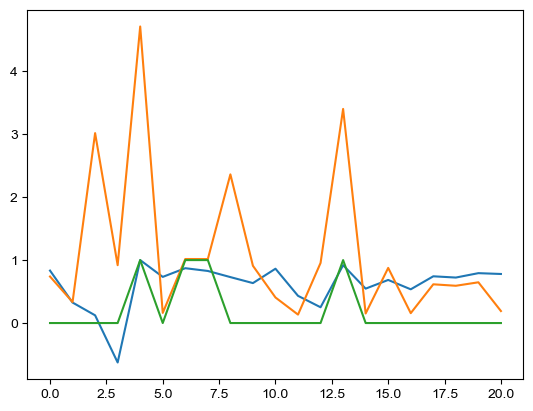

In [313]:
plt.plot(_corrs)
plt.plot(vec)
plt.plot(vec_code)

In [314]:
vec_code

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [307]:
from scipy.spatial.distance import cdist

In [318]:
vec_dict = cdist([vec_code], code_array)[0]**2

In [319]:
np.sort(vec_dict)

array([ 2.,  2.,  2., ..., 10., 10., 10.])

In [320]:
np.argmin(vec_dict)

242

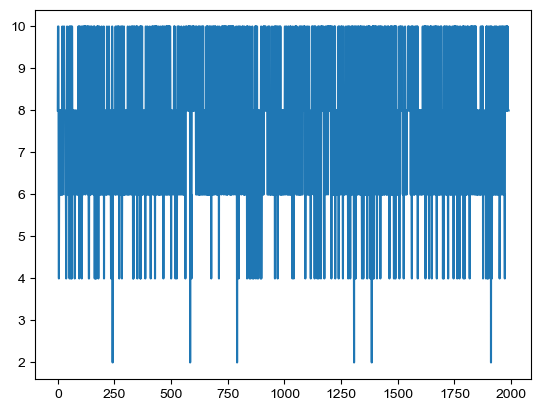

In [321]:
plt.plot(vec_dict)

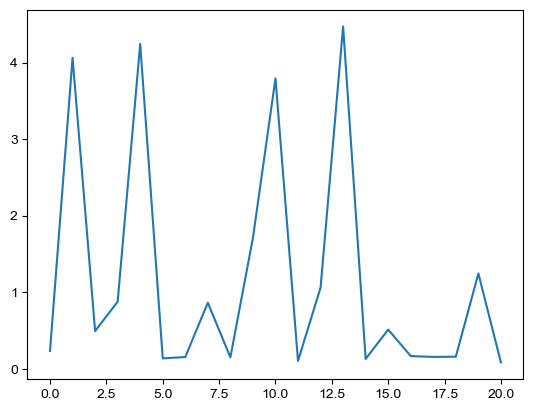

In [258]:
plt.figure()
plt.plot(vec)

In [102]:
neighbor_id_list

[array([38., 39., 40., 41., 41., 41., 42., 43., 44., 46., 47., 49., 50.,
        51., 52., 53., 54., 55., 56.]),
 array([38., 40., 41., 45., 46., 49., 50., 52., 56.]),
 array([38., 40., 41., 43., 46., 47., 48., 49., 50., 56., 57.]),
 array([39., 40., 41., 42., 43., 44., 45., 46., 47., 49., 50., 51., 52.,
        53., 54., 56., 57.]),
 array([40., 41., 43., 50., 56.]),
 array([38., 39., 40., 41., 43., 44., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 56., 57.]),
 array([38., 39., 40., 40., 41., 42., 43., 44., 47., 47., 49., 50., 52.,
        54., 55., 56., 57.]),
 array([40., 42., 44., 44., 47., 50., 52., 53., 56.]),
 array([38., 39., 41., 42., 43., 44., 47., 49., 50., 52., 53., 54., 56.]),
 array([38., 39., 41., 43., 44., 46., 47., 49., 50., 52., 53., 56., 57.]),
 array([38., 40., 41., 44., 47., 48., 49., 52., 56., 57.]),
 array([41., 44., 56.]),
 array([39., 41., 42., 43., 44., 45., 47., 49., 52., 54., 56., 57.]),
 array([40., 41., 43., 44., 47., 49., 56., 57.]),
 array([38., 

In [60]:
neighbor_id_list

[array([37., 39., 41., 46., 47., 50.]),
 array([37., 40., 41., 45., 56.]),
 array([37., 40., 41., 47., 48.]),
 array([37., 40., 41., 42., 44., 47., 49., 51., 52., 53., 54., 56., 57.]),
 array([37., 40.]),
 array([37., 38., 41., 43., 44., 46., 47., 49., 52., 53., 54., 56.]),
 array([37., 38., 40., 42., 43., 44., 47., 49., 50., 52., 54., 56.]),
 array([37., 40., 42., 44., 47., 50., 52., 53., 56.]),
 array([37., 41., 44., 47., 50.]),
 array([37., 38., 41., 43., 44., 47., 49., 50., 52., 56.]),
 array([37., 40., 41., 44., 49.]),
 array([37., 41.]),
 array([37., 41., 44., 45., 47., 49., 54., 56.]),
 array([37., 40., 41., 43., 44., 47., 56.]),
 array([37., 38., 40., 41., 48., 49., 56.]),
 array([37., 41., 44.]),
 array([37., 41., 44., 46., 47., 49., 52., 56.]),
 array([37., 38., 41., 44., 52.]),
 array([37., 38., 41., 43., 44., 47., 48., 49., 50., 54., 56.]),
 array([37.]),
 array([37., 39., 41., 44., 53.]),
 array([37., 38., 41., 43., 44., 49.]),
 array([37., 38., 39., 40., 41., 42., 44., 47

In [55]:
len(results)

8368

In [52]:
_tree.query_ball_point?

In [36]:
codebook

,Name,bit-37_RS1326,bit-38_RS1334,bit-39_RS1404,bit-40_RS1470,bit-41_RS1496,bit-42_RS1520,bit-43_RS1641,bit-44_RS1678,bit-45_RS1719,...,bit-48_RS2179,bit-49_RS2184,bit-50_RS2211,bit-51_RS2232,bit-52_RS2274,bit-53_RS2283,bit-54_RS2285,bit-55_RS2287,bit-56_RS2288,bit-57_RS2299
0,MF_PE_TS_IntBC1,0,0,0,0,0,0,1,0,1,...,1,0,0,1,1,0,0,0,0,0
1,MF_PE_TS_IntBC2,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,MF_PE_TS_IntBC3,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,MF_PE_TS_IntBC4,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,MF_PE_TS_IntBC5,0,1,0,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,MF_PE_TS_IntBC1986,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0
1986,MF_PE_TS_IntBC1987,0,1,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1987,MF_PE_TS_IntBC1988,0,1,0,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1988,MF_PE_TS_IntBC1989,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
